In [1]:
from astropy.table import Table
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid

plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13

In [2]:
base = 'Filters'
filters = ['CFHT_MegaCam.u.dat', 'Subaru_HSC.g.dat', 
           'Subaru_HSC.r.dat', 'Subaru_HSC.i.dat', 
           'Subaru_HSC.z.dat', 'Subaru_HSC.Y.dat', 
           'Euclid_VIS.vis.dat', 'Euclid_NISP.Y.dat', 
           'Euclid_NISP.J.dat', 'Euclid_NISP.H.dat', 
           'Spitzer_IRAC.I1.dat', 'Spitzer_IRAC.I2.dat']

full_path = [f'{base}/{x}' for x in filters]

In [3]:
def eff_wave(filter):

    tab = Table.read(filter, format = 'ascii')

    wave = tab['col1']
    tlam = tab['col2']

    num = wave * tlam
    denom = tlam

    int_num = trapezoid(num, x = wave)
    int_denom = trapezoid(denom, x = wave)

    lambda_eff = int_num/int_denom

    return lambda_eff

In [4]:
def plot_filter_curves(filter_files, ax = None, scale = 1):

    if not ax:
        fig, ax = plt.subplots(figsize = (12, 6))
    
        for file in filter_files:
            tab = Table.read(file, format = 'ascii')
            wave = tab['col1']
            tlam = tab['col2']
                
            ax.plot(wave, tlam*scale)
        
        ax.set_xlabel(r'Wavelength [$\AA$]', fontsize = 20)

        return fig, ax

    else:

        for file in filter_files:
            tab = Table.read(file, format = 'ascii')
            wave = tab['col1']
            tlam = tab['col2']
                
            ax.plot(wave, tlam*scale)
        
        ax.set_xlabel(r'Wavelength [$\AA$]', fontsize = 20)

        return ax

        

In [5]:
import bagpipes as pipes

In [6]:
z = 0.5
dust = {}                         
dust["type"] = "Calzetti"         
dust["Av"] = 0.2                  
dust["eta"] = 3.                  

nebular = {}                      
nebular["logU"] = -3.             

dblplaw = {}
dblplaw["tau"] = 5.
dblplaw["alpha"] = 2.5
dblplaw["beta"] = 10.
dblplaw["massformed"] = 10.
dblplaw["metallicity"] = 0.5

burst1 = {}
burst1["age"] = 0.2
burst1["massformed"] = 7.
burst1["metallicity"] = 1.

burst2 = {}
burst2["age"] = 3.
burst2["massformed"] = 7.5
burst2["metallicity"] = 0.2

model_components = {}                   
model_components["redshift"] = z      
model_components["veldisp"] = 200. 
model_components["burst1"] = burst1
model_components["burst2"] = burst2
model_components["dblplaw"] = dblplaw
model_components["dust"] = dust
model_components["nebular"] = nebular

model = pipes.model_galaxy(model_components,filt_list=full_path)

In [7]:
def convert_fnu(wave, flux):

    c_A_s = 3e18

    conv = wave**2/c_A_s

    fnu = flux*conv

    return fnu

In [8]:
eff_waves_vals = np.loadtxt('filter_lambda_eff.dat')

In [9]:
filter_names = ['u', 'g', 'r', 'i', 'z', 'y', 'vis', 'NISP Y', 'NISP J', 'NISP H', 'IRAC CH1', 'IRAC CH2']

In [23]:
eff_waves_vals

array([ 3681.72352534,  4816.11014663,  6234.11063924,  7740.57975725,
        8911.61988204,  9779.92802444,  7180.86242252, 10812.42977628,
       13669.52984677, 17707.85350928, 35572.59280879, 45049.2742452 ])

Text(0, 0.5, 'F$_{\\nu}$ [ergs$^{-1}$cm$^{-2}$Hz$^{-1}$]')

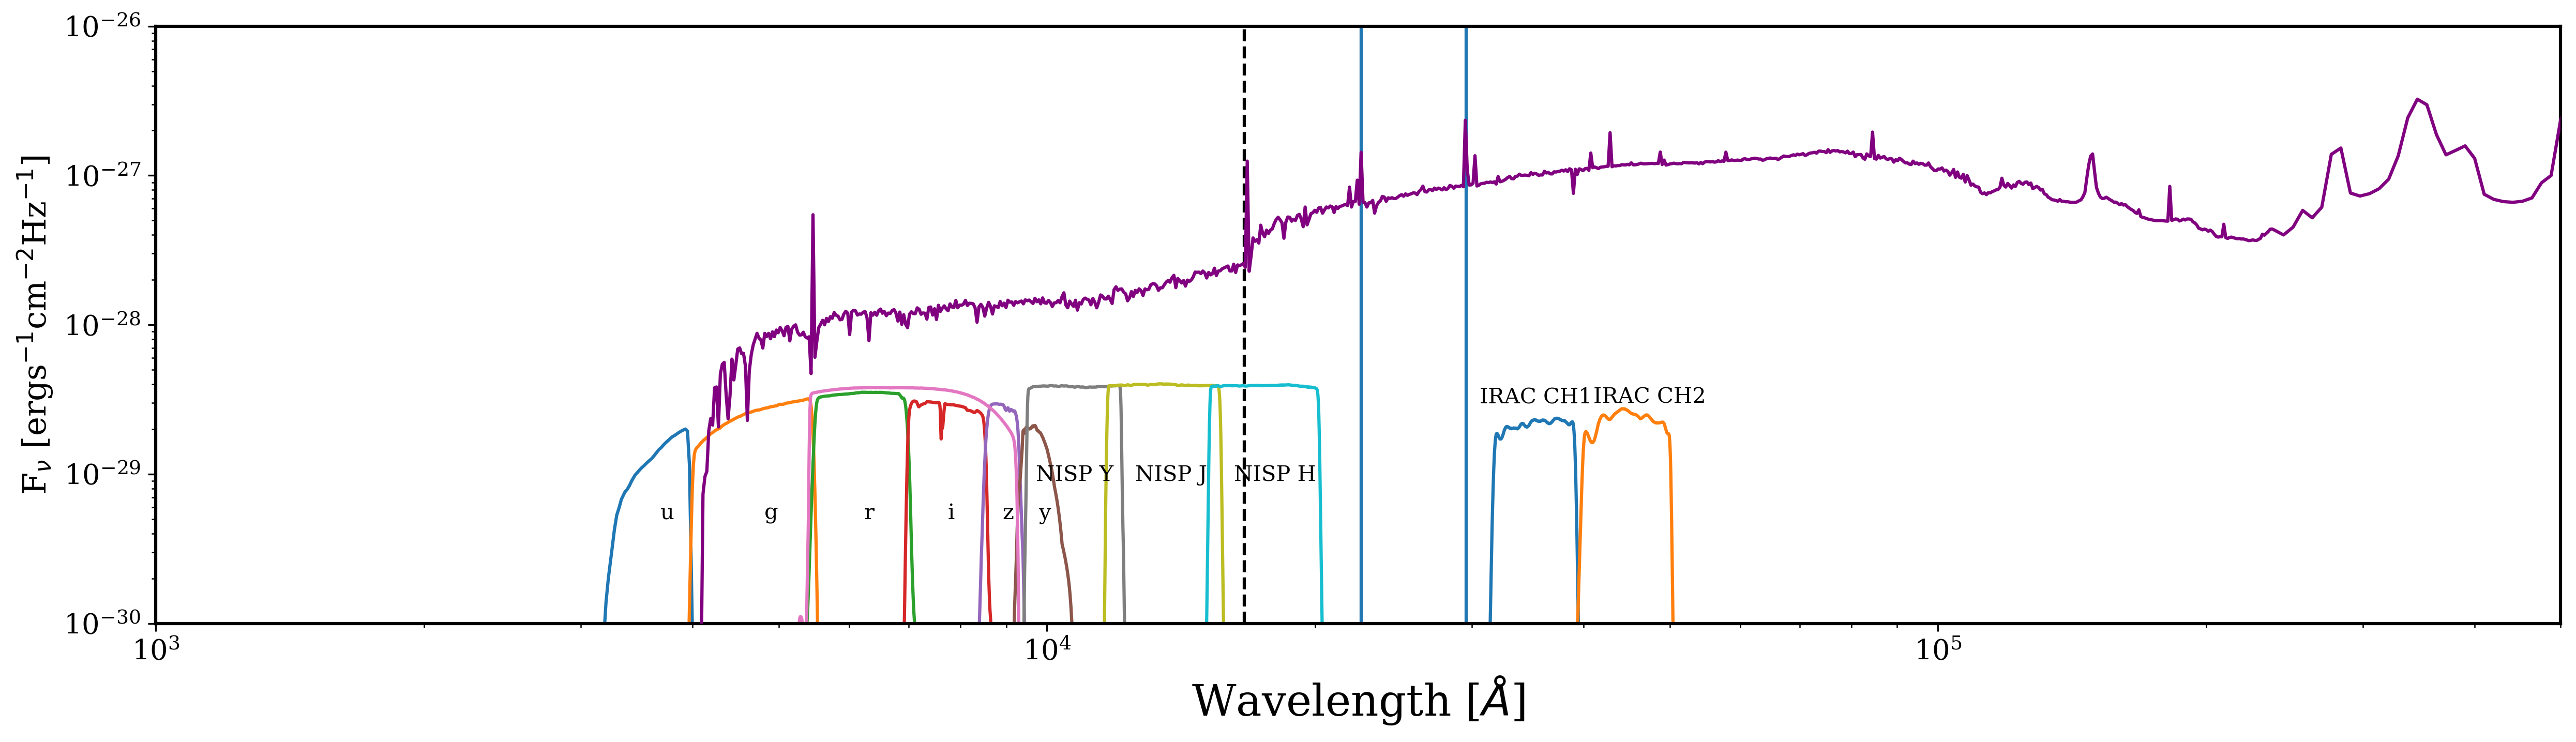

In [10]:
z = 3.5

halpha = 6564
oiii = 5007
fig, ax = plt.subplots(figsize = (20, 5), dpi = 300)

ax.loglog(model.wavelengths * (1+z), convert_fnu(model.wavelengths*(1+z), model.spectrum_full), zorder = 99, color = 'purple')
ax.axvline(3700*(1+z), color = 'black', ls = '--')
ax = plot_filter_curves(full_path, ax = ax, scale = 5e-29)
# for names, waves in zip(filter_names, eff_waves_vals):
#     if names == 'vis':
#         ax.annotate(names, (waves - 100, 2e-30))
#     else:
#         ax.annotate(names, (waves - 100, 5e-30))

ax.annotate(filter_names[0], (eff_waves_vals[0], 5e-30))
ax.annotate(filter_names[1], (eff_waves_vals[1], 5e-30))
ax.annotate(filter_names[2], (eff_waves_vals[2], 5e-30))
ax.annotate(filter_names[3], (eff_waves_vals[3], 5e-30))
ax.annotate(filter_names[4], (eff_waves_vals[4], 5e-30))
ax.annotate(filter_names[5], (eff_waves_vals[5], 5e-30))

#ax.annotate(filter_names[6], (eff_waves_vals[6], 5e-30))
ax.annotate(filter_names[7], (eff_waves_vals[7]-1100, 9e-30))
ax.annotate(filter_names[8], (eff_waves_vals[8]-1100, 9e-30))
ax.annotate(filter_names[9], (eff_waves_vals[9]-1500, 9e-30))

ax.annotate(filter_names[10], (eff_waves_vals[10]-5000, 3e-29))
ax.annotate(filter_names[11], (eff_waves_vals[11]-4000, 3e-29))


ax.axvline(halpha*(1+z))
ax.axvline(oiii*(1+z))

ax.set_xlim(1e3, 5e5)
ax.set_ylim(1e-30, 1e-26)
ax.set_ylabel(r'F$_{\nu}$ [ergs$^{-1}$cm$^{-2}$Hz$^{-1}$]', fontsize = 15)

In [58]:
from astropy.cosmology import FlatLambdaCDM

In [59]:
cosmo = FlatLambdaCDM(H0 = 70, Om0 = .3)

In [66]:
cosmo.kpc_proper_per_arcmin(6) * .5

<Quantity 171.352271 kpc / arcmin>

In [67]:
cosmo.kpc_proper_per_arcmin(2) * .5

<Quantity 251.12679999 kpc / arcmin>

In [ ]:
#Bands of Interest
#Redshift 2: u, g, r, i (UV) NISP J, H  and IRAC Ch1 and CH2  (Optical)
#Redshift 2.5: g, r, i, z (UV) NISP H  and IRAC Ch1 and CH2  (Optical)
#Redshift 3:  r, i, z (UV) NISP H (maybe)  and IRAC Ch1 and CH2  (Optical)
#Redshift 3.5:  i, z, y (UV) and IRAC Ch1 and CH2 (Optical)

In [120]:
def model(eff_lam, beta, c):

    return -2.5 * (beta +2) *np.log10(eff_lam) + c

In [62]:
euclid_tab = Table.read('edfn_dawn_catalog_sept2024.fits')

In [70]:
euclid_tab.colnames

['id',
 'ra',
 'dec',
 'group_pop',
 'group_id',
 'brick_id',
 'thresh',
 'npix',
 'tnpix',
 'model_type',
 'total_nstep',
 'cfht_u_flux',
 'cfht_u_flux_err',
 'cfht_u_flux_ujy',
 'cfht_u_flux_ujy_err',
 'cfht_u_mag',
 'cfht_u_mag_err',
 'hsc_g_flux',
 'hsc_g_flux_err',
 'hsc_g_flux_ujy',
 'hsc_g_flux_ujy_err',
 'hsc_g_mag',
 'hsc_g_mag_err',
 'hsc_r_flux',
 'hsc_r_flux_err',
 'hsc_r_flux_ujy',
 'hsc_r_flux_ujy_err',
 'hsc_r_mag',
 'hsc_r_mag_err',
 'hsc_i_flux',
 'hsc_i_flux_err',
 'hsc_i_flux_ujy',
 'hsc_i_flux_ujy_err',
 'hsc_i_mag',
 'hsc_i_mag_err',
 'hsc_z_flux',
 'hsc_z_flux_err',
 'hsc_z_flux_ujy',
 'hsc_z_flux_ujy_err',
 'hsc_z_mag',
 'hsc_z_mag_err',
 'hsc_y_flux',
 'hsc_y_flux_err',
 'hsc_y_flux_ujy',
 'hsc_y_flux_ujy_err',
 'hsc_y_mag',
 'hsc_y_mag_err',
 'nisp_y_flux',
 'nisp_y_flux_err',
 'nisp_y_flux_ujy',
 'nisp_y_flux_ujy_err',
 'nisp_y_mag',
 'nisp_y_mag_err',
 'nisp_y_rchisq',
 'nisp_y_chisq',
 'nisp_y_flag',
 'nisp_j_flux',
 'nisp_j_flux_err',
 'nisp_j_flux_ujy',
 '

In [64]:
euclid_cols = [  'id',
                 'ra',
                 'dec',
                 'cfht_u_flux_ujy',
                 'cfht_u_flux_ujy_err',
                 'hsc_g_flux_ujy',
                 'hsc_g_flux_ujy_err',
                 'hsc_r_flux_ujy',
                 'hsc_r_flux_ujy_err',
                 'hsc_i_flux_ujy',
                 'hsc_i_flux_ujy_err',
                 'hsc_z_flux_ujy',
                 'hsc_z_flux_ujy_err',
                 'hsc_y_flux_ujy',
                 'hsc_y_flux_ujy_err',
                 'tf_vis_05_ujy',
                 'te_vis_05_ujy',
                 'tf_vis_10_ujy',
                 'te_vis_10_ujy',
                 'nisp_y_flux_ujy',
                 'nisp_y_flux_ujy_err',
                 'nisp_j_flux_ujy',
                 'nisp_j_flux_ujy_err',
                 'nisp_h_flux_ujy',
                 'nisp_h_flux_ujy_err',
                 'irac_ch1_flux_ujy',
                 'irac_ch1_flux_ujy_err',
                 'irac_ch2_flux_ujy',
                 'irac_ch2_flux_ujy_err',
                 ]
reduced_euclid_tab = euclid_tab[euclid_cols]

In [65]:
reduced_euclid_tab[:10]

id,ra,dec,cfht_u_flux_ujy,cfht_u_flux_ujy_err,hsc_g_flux_ujy,hsc_g_flux_ujy_err,hsc_r_flux_ujy,hsc_r_flux_ujy_err,hsc_i_flux_ujy,hsc_i_flux_ujy_err,hsc_z_flux_ujy,hsc_z_flux_ujy_err,hsc_y_flux_ujy,hsc_y_flux_ujy_err,tf_vis_05_ujy,te_vis_05_ujy,tf_vis_10_ujy,te_vis_10_ujy,nisp_y_flux_ujy,nisp_y_flux_ujy_err,nisp_j_flux_ujy,nisp_j_flux_ujy_err,nisp_h_flux_ujy,nisp_h_flux_ujy_err,irac_ch1_flux_ujy,irac_ch1_flux_ujy_err,irac_ch2_flux_ujy,irac_ch2_flux_ujy_err
,deg,deg,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,,,,,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,264.471140330578,66.95593661059101,0.05660091411865595,0.053350821832461585,0.06982425655863264,0.013850089376591735,0.09652225399560387,0.01948666913691499,0.18825779779477841,0.025924701699048428,0.10253741792624972,0.0377452869873475,-0.027448914269326805,0.10830665728471474,0.04896524752556367,0.014387732298483884,0.11878008505043001,0.023042404488821864,0.18303506472922826,0.032185077136361755,0.15006316834900138,0.02544109686566973,0.4143763583204101,0.028375259717736148,-0.03704216163479642,0.41007163774479244,0.3851701089933481,0.4503460466039472
2,264.47142330640844,66.95768061661974,0.19130304245812108,0.06671321030748209,0.10979043216191409,0.017944674937470217,0.14571709043885578,0.02490533516757777,0.16243443661094153,0.03301209805393721,0.12976147691995957,0.048432945539161595,0.10137989375878384,0.14407346064466056,0.07727185000570601,0.015154259095269247,0.12345011871532557,0.02339940742758394,0.3445420908793238,0.042855737787709854,0.46923022179520885,0.03427933282538182,0.34156028518622833,0.039850137155371994,-1.0425662432253815,0.46185851680495293,-0.1828443567991866,0.4532100166308406
3,264.4718023840319,66.95789659014498,-0.01680971381504771,0.04976484709787021,0.01306808270650771,0.012135015245542741,0.0034578530608556884,0.01725451432637113,0.02250209059945307,0.021771251520437393,0.0004277520579114374,0.03253586821354264,0.05961208433764435,0.09886845252864916,0.008779830546894934,0.014149309222675453,0.01954945005852223,0.023069911386288854,0.015101543870368446,0.024890329732668966,0.0006976764963191755,0.020833651002494666,0.32873303033941054,0.025789757077847364,-0.31563220078259013,0.44454141166614475,-0.22999442670738415,0.38279716953469894
4,264.4718766963497,66.95658971723807,0.03217186469283255,0.056797746192798176,0.23116588280043748,0.016572503132261805,0.32058389101370305,0.0240843191346416,0.42713162956226386,0.031077359234737305,0.5119904705678977,0.04682414567076981,0.435322496045238,0.12802949487964616,0.1344445871143506,0.013379308892533389,0.2707533992577829,0.021829456106341,0.6444354569672583,0.048272492505560434,0.9372440162475749,0.03711466478693392,1.528298581883026,0.040882177173386436,1.164261108566829,0.33032540200411037,1.6532536646164273,0.40450936495281564
5,264.472255071821,66.95257793334021,0.27655824794398043,0.0497086770901218,0.17583884832072974,0.013840260171314626,0.20335495133814288,0.020214738599562625,0.41066777762784484,0.025589791872761884,0.6475846335807464,0.03742081602916211,0.9957550194307087,0.10415931059412276,0.15060980049551376,0.016227645642109146,0.2759025340116472,0.02433316727589201,1.136834503484549,0.037775729393678986,1.2702382387506457,0.02785918610909743,1.6861785521311339,0.03157488054284656,0.18654977448226495,0.20742634790847594,1.4119484118718884,0.29898345376000995
6,264.4730658099766,66.94722505254214,0.017473469474344278,0.047718052458477433,0.149665710233842,0.012133999998308326,0.4981131334482222,0.018044952896149165,0.6831257471038565,0.022924136782790816,0.6869670150511765,0.03329211764672389,0.7536863835365784,0.10101271642574074,0.4271822868611456,0.01516862717960446,0.5224761860766005,0.020883921473647114,0.8160544296681509,0.03163873432332296,0.914948790